## Preprocessing

In [1]:
import warnings
warnings.filterwarnings("ignore")

#data
import pandas as pd
import numpy as np

#plotting
import matplotlib.pyplot as plt
import seaborn as sns

#data preprocessing
%pip install missingno
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

#feature selection
from sklearn import feature_selection as fs
from sklearn.decomposition import PCA

#machine learning model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ryan840919\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
#read the data
data = pd.DataFrame(pd.read_csv('bodyPerformance.csv'))

In [3]:
genderdum = pd.get_dummies(data.gender)
genderdum.head()

,F,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [4]:
classord = data[['class']].replace(['A','B','C','D'],[1,2,3,4])
classord.head()

,class
0,3
1,1
2,3
3,2
4,2


In [5]:
def outdet(columns):
    q1 = np.percentile(columns,25)
    q3 = np.percentile(columns,75)
    iqr = q3-q1
    floor = q1 - 1.5*iqr
    roof = q3 + 1.5*iqr
    # new way to form a list
    outindex = list(columns.index[(columns < floor)|(columns > roof)])
    outvalue = list(columns[outindex])
    outlist = []
    for i in range(len(outvalue)):
        outlist.append([outindex[i],outvalue[i]])
    for i in outlist:
        if i[1] < floor:
            columns[i[0]] = floor
            # print(i[0],columns[i[0]])
        if i[1] > roof:
            columns[i[0]] = roof
            # print(i[0],columns[i[0]])

In [6]:
#drop gender and class first
datadrop = data.drop(['gender','class'], axis=1)

for _,i in datadrop.iteritems():
    outdet(i)

In [8]:
#standardize
sc = StandardScaler()
datadropstdtest = sc.fit_transform(datadrop)
datadropstd = pd.DataFrame(datadropstdtest, columns = datadrop.columns)
datadropstd.head()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,-0.717432,0.444082,0.663741,-0.267087,0.112277,-0.016197,1.688286,0.397959,1.416961,0.677630
1,-0.864220,-0.423312,-0.983292,-1.045934,-0.170249,-0.290824,-0.053097,0.124824,0.926634,0.981401
2,-0.423857,1.311477,0.897579,-0.433983,1.242382,1.494252,0.737585,-0.434454,0.646446,-0.233681
3,-0.350463,0.705489,0.312984,-0.670418,-0.264425,1.150968,0.417547,-0.018247,0.926634,0.728259
4,-0.644038,0.622314,0.024923,-0.851222,-0.829477,-0.222167,0.615218,1.529520,0.366259,0.677630


In [9]:
datafeature = pd.concat([genderdum,datadropstd], axis=1)
datafeature.head()

,F,M,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,0,1,-0.717432,0.444082,0.663741,-0.267087,0.112277,-0.016197,1.688286,0.397959,1.416961,0.677630
1,0,1,-0.864220,-0.423312,-0.983292,-1.045934,-0.170249,-0.290824,-0.053097,0.124824,0.926634,0.981401
2,0,1,-0.423857,1.311477,0.897579,-0.433983,1.242382,1.494252,0.737585,-0.434454,0.646446,-0.233681
3,0,1,-0.350463,0.705489,0.312984,-0.670418,-0.264425,1.150968,0.417547,-0.018247,0.926634,0.728259
4,0,1,-0.644038,0.622314,0.024923,-0.851222,-0.829477,-0.222167,0.615218,1.529520,0.366259,0.677630


In [10]:
#split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(datafeature,classord,test_size=0.3,random_state=100)

## Training

### Logistic Regression

In [11]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
print('train:',lr.score(x_train,y_train))
print('test:',lr.score(x_test,y_test))

train: 0.6257066666666666
test: 0.6037829766052762


### KNN

p=1,weights=uniform: 
for 1 points:  train: 1.0  test: 0.552762568442011
for 11 points:  train: 0.7025066666666666  test: 0.625933300149328
for 21 points:  train: 0.6884266666666666  test: 0.6398705823792932
for 31 points:  train: 0.67808  test: 0.6403683424589348
for 41 points:  train: 0.67424  test: 0.6373817819810851
p=1,weights=distance: 
for 1 points:  train: 1.0  test: 0.552762568442011
for 11 points:  train: 1.0  test: 0.6286709805873569
for 21 points:  train: 1.0  test: 0.6418616226978596
for 31 points:  train: 1.0  test: 0.6448481831757094
for 41 points:  train: 1.0  test: 0.6391239422598307
p=2,weights=uniform: 
for 1 points:  train: 1.0  test: 0.5579890492782479
for 11 points:  train: 0.6893866666666667  test: 0.6107516177202589
for 21 points:  train: 0.67168  test: 0.6217023394723743
for 31 points:  train: 0.664  test: 0.6261821801891488
for 41 points:  train: 0.6555733333333333  test: 0.6234444997511199
p=2,weights=distance: 
for 1 points:  train: 1.0  test: 0.557989049278

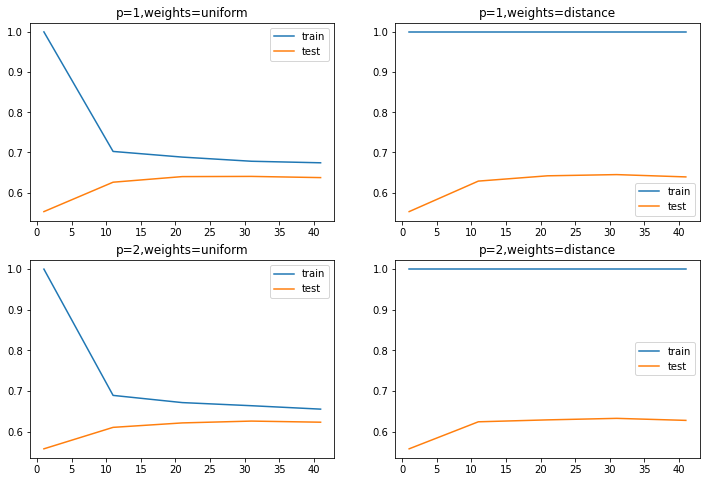

In [12]:
fk = plt.figure(figsize=(12,8))
poslab = 0
for i in [1,2]:
    for x in ['uniform','distance']:
        print(f"p={i},weights={x}: ")
        poslab += 1
        Score_clf_train = []
        Score_clf_test = []
        for m in range(1,51,10):
            clf = KNeighborsClassifier(n_neighbors=m,p=i,weights=x,algorithm='brute')
            clf.fit(x_train,y_train)
            print('for {} points:'.format(m),end='  ')
            print('train:',clf.score(x_train,y_train), end='  ')
            print('test:',clf.score(x_test,y_test))
            Score_clf_train.append(clf.score(x_train,y_train))
            Score_clf_test.append(clf.score(x_test,y_test))
        fk.add_subplot(2,2,poslab)
        plt.plot(range(1,51,10),Score_clf_train,label = 'train')
        plt.plot(range(1,51,10),Score_clf_test,label = 'test')
        plt.legend()
        plt.title(f"p={i},weights={x}")
plt.show()

### Decision Tree

criterion=entropy:
for 1 max_dapth:  train: 0.41408  test: 0.4051767048282728
for 2 max_dapth:  train: 0.47669333333333336  test: 0.46366351418616225
for 3 max_dapth:  train: 0.5674666666666667  test: 0.547536087605774
for 4 max_dapth:  train: 0.57312  test: 0.5487804878048781
for 5 max_dapth:  train: 0.5995733333333333  test: 0.5726729716276755
for 6 max_dapth:  train: 0.6314666666666666  test: 0.6087605774016924
for 7 max_dapth:  train: 0.6740266666666667  test: 0.6241911398705824
for 8 max_dapth:  train: 0.7085866666666667  test: 0.6453459432553509
for 9 max_dapth:  train: 0.7464533333333333  test: 0.6557989049278248
for 10 max_dapth:  train: 0.77632  test: 0.6582877053260329
for 11 max_dapth:  train: 0.80768  test: 0.6585365853658537
for 12 max_dapth:  train: 0.83456  test: 0.6508213041314087
for 13 max_dapth:  train: 0.856  test: 0.6577899452463912
for 14 max_dapth:  train: 0.8731733333333334  test: 0.6515679442508711
for 15 max_dapth:  train: 0.8846933333333333  test: 0.654305624

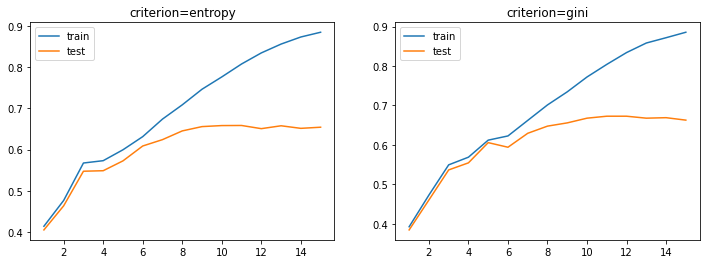

In [13]:
fd = plt.figure(figsize=(12,4))
poslab = 0
for i in ['entropy','gini']:
    print(f"criterion={i}:")
    poslab += 1
    Score_clt_train = []
    Score_clt_test = []
    for m in range(1,16):
        clt = DecisionTreeClassifier(criterion=i,max_depth=m,min_samples_split=10)
        clt.fit(x_train,y_train)
        print('for {} max_dapth:'.format(m),end='  ')
        print('train:',clt.score(x_train,y_train),end='  ')
        print('test:',clt.score(x_test,y_test))
        Score_clt_train.append(clt.score(x_train,y_train))
        Score_clt_test.append(clt.score(x_test,y_test))
    fd.add_subplot(1,2,poslab)
    plt.plot(range(1,16),Score_clt_train,label='train')
    plt.plot(range(1,16),Score_clt_test,label='test')
    plt.legend()
    plt.title(f"criterion={i}")
plt.show()

### Random Forest

criterion=gini:
for 1 trees:  train: 0.8352  oob: 0.36224  test: 0.5378297660527626
for 101 trees:  train: 1.0  oob: 0.7179733333333334  test: 0.7247386759581882
for 201 trees:  train: 1.0  oob: 0.7296  test: 0.7319561971129915
for 301 trees:  train: 1.0  oob: 0.7377066666666666  test: 0.7346938775510204
for 401 trees:  train: 1.0  oob: 0.73696  test: 0.7332005973120955
for 501 trees:  train: 1.0  oob: 0.7377066666666666  test: 0.7314584370333499
criterion=entropy:
for 1 trees:  train: 0.8411733333333333  oob: 0.36821333333333334  test: 0.5535092085614733
for 101 trees:  train: 1.0  oob: 0.7271466666666667  test: 0.7284718765555003
for 201 trees:  train: 1.0  oob: 0.7361066666666667  test: 0.7309606769537084
for 301 trees:  train: 1.0  oob: 0.7376  test: 0.7354405176704828
for 401 trees:  train: 1.0  oob: 0.7357866666666667  test: 0.7341961174713788
for 501 trees:  train: 1.0  oob: 0.7376  test: 0.7366849178695869


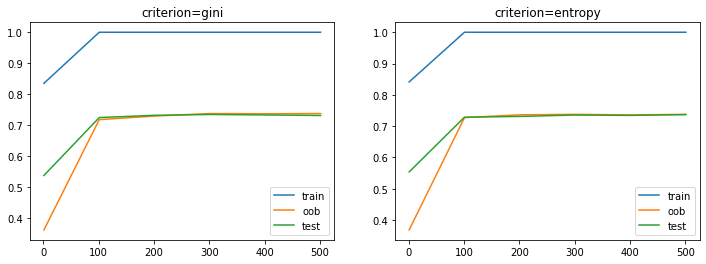

In [14]:
fr = plt.figure(figsize=(12,4))
poslab = 0
for i in ['gini','entropy']:
    print(f"criterion={i}:")
    poslab += 1
    Score_clr_train = []
    Score_clr_test = []
    Score_clr_oob = []
    for m in range(1,502,100):    
        clr = RandomForestClassifier(criterion=i, n_estimators=m, random_state=100, oob_score = True, n_jobs=10)
        clr.fit(x_train,y_train)
        print(f'for {m} trees:',end='  ')
        print('train:',clr.score(x_train,y_train),end='  ')
        print('oob:',clr.oob_score_,end='  ')
        print('test:',clr.score(x_test,y_test))
        Score_clr_train.append(clr.score(x_train,y_train))
        Score_clr_oob.append(clr.oob_score_)
        Score_clr_test.append(clr.score(x_test,y_test))
    fr.add_subplot(1,2,poslab)
    plt.plot(range(1,502,100),Score_clr_train,label='train')
    plt.plot(range(1,502,100),Score_clr_oob,label='oob')
    plt.plot(range(1,502,100),Score_clr_test,label='test')
    plt.legend()
    plt.title(f"criterion={i}")
plt.show()

## Feature Selection

### Logistic Regression_feature selection

for select 1 features:
train: 0.45514666666666664
test: 0.47112991538078647
Index(['sit and bend forward_cm'], dtype='object') 

for select 2 features:
train: 0.5390933333333333
test: 0.5331010452961672
Index(['sit and bend forward_cm', 'sit-ups counts'], dtype='object') 

for select 3 features:
train: 0.5495466666666666
test: 0.5438028870084619
Index(['body fat_%', 'sit and bend forward_cm', 'sit-ups counts'], dtype='object') 

for select 4 features:
train: 0.5533866666666667
test: 0.5438028870084619
Index(['body fat_%', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm'],
      dtype='object') 

for select 5 features:
train: 0.5508266666666667
test: 0.5425584868093579
Index(['body fat_%', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm'],
      dtype='object') 

for select 6 features:
train: 0.5712
test: 0.5664509706321553
Index(['weight_kg', 'body fat_%', 'gripForce', 'sit and bend forward_cm',
       'sit-ups counts', 'broad jump_cm'

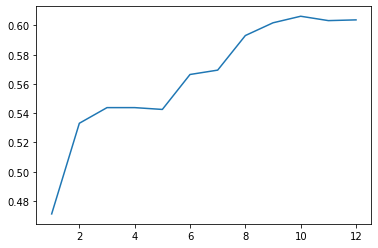

In [16]:
Score_lr_sc_total = []
for i in range(1,13,1):
    fssc = fs.SelectKBest(fs.mutual_info_classif,k=i)
    x_train_sc = fssc.fit_transform(x_train,y_train)
    x_test_sc = fssc.transform(x_test)
    x_train_sc = pd.DataFrame(x_train_sc, columns=x_train.columns[fssc.get_support()])
    x_test_sc = pd.DataFrame(x_test_sc, columns=x_train.columns[fssc.get_support()])
    lr_sc = LogisticRegression(solver='lbfgs',multi_class='auto')
    lr_sc.fit(x_train_sc,y_train)
    print('for select {} features:'.format(i))
    print('train:',lr_sc.score(x_train_sc,y_train))
    print('test:',lr_sc.score(x_test_sc,y_test))
    print(x_train_sc.columns,'\n')
    Score_lr_sc_total.append(lr_sc.score(x_test_sc,y_test))
    
plt.plot(range(1,13,1),Score_lr_sc_total)
plt.show()

### KNN_Feature selection

In [17]:
Score_clf_sc_total = []
for i in range(1,13,1):
    fssc = fs.SelectKBest(fs.mutual_info_classif,k=i)
    x_train_sc = fssc.fit_transform(x_train,y_train)
    x_test_sc = fssc.transform(x_test)
    print('for select {} features:'.format(i))
    Score_clf_sc = []
    for m in range(10,51,10):
        clf_sc = KNeighborsClassifier(n_neighbors=m,p=1,weights='uniform',algorithm='brute')
        clf_sc.fit(x_train_sc,y_train)
        print('for {} points:'.format(m),end='  ')
        print('train:',clf_sc.score(x_train_sc,y_train),end='  ')
        print('test',clf_sc.score(x_test_sc,y_test))
        Score_clf_sc.append(clf_sc.score(x_test_sc,y_test))
    Score_clf_sc_total.append(Score_clf_sc)

for select 1 features:
for 10 points:  train: 0.47776  test 0.45744151319064214
for 20 points:  train: 0.4938666666666667  test 0.47088103534096565
for 30 points:  train: 0.49834666666666666  test 0.4726231956197113
for 40 points:  train: 0.50144  test 0.4763563962170234
for 50 points:  train: 0.5015466666666667  test 0.47336983573917374
for select 2 features:
for 10 points:  train: 0.6301866666666667  test 0.5485316077650573
for 20 points:  train: 0.60384  test 0.5530114484818317
for 30 points:  train: 0.5989333333333333  test 0.5629666500746641
for 40 points:  train: 0.5876266666666666  test 0.5759084121453459
for 50 points:  train: 0.5888  test 0.579641612742658
for select 3 features:
for 10 points:  train: 0.648  test 0.5739173718267795
for 20 points:  train: 0.6276266666666667  test 0.5868591338974615
for 30 points:  train: 0.6142933333333334  test 0.5866102538576407
for 40 points:  train: 0.6078933333333333  test 0.5920856147336984
for 50 points:  train: 0.6056533333333334  test 

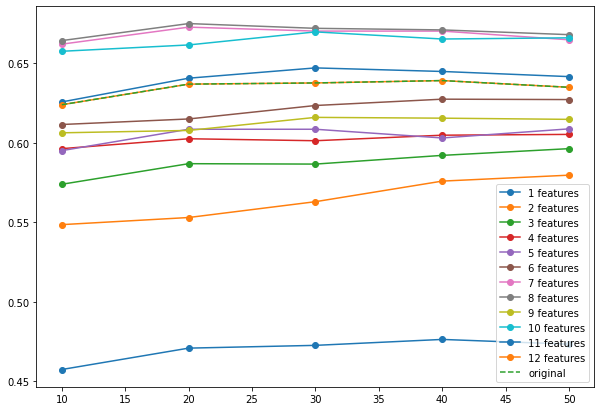

In [18]:
Score_clf = []
for m in range(10,51,10):#觀察鄰近點數量對模型影響
    clf = KNeighborsClassifier(n_neighbors=m,p=1,weights='uniform',algorithm='brute')
    clf.fit(x_train,y_train)
    Score_clf.append(clf.score(x_test,y_test))

plt.figure(figsize=(10,7))
for i in range(len(Score_clf_sc_total)):
    plt.plot(range(10,51,10),Score_clf_sc_total[i],"o-",label='{} features'.format(i+1))
plt.plot(range(10,51,10),Score_clf,"--",label='original')
plt.legend(loc='best')
plt.show()

### Dicision Tree_Feature selection

In [19]:
Score_clt_sc_total = []
for i in range(1,13,1):
    fssc = fs.SelectKBest(fs.mutual_info_classif,k=i)
    x_train_sc = fssc.fit_transform(x_train,y_train)
    x_test_sc = fssc.transform(x_test)
    print('for select {} features:'.format(i))
    Score_clt_sc = []
    for m in range(1,20):
        clt_sc = DecisionTreeClassifier(criterion='gini',max_depth=m)
        clt_sc.fit(x_train_sc,y_train)
        print('for {} max_dapth:'.format(m),end='  ')
        print('train:',clt_sc.score(x_train_sc,y_train),end='  ')
        print('test',clt_sc.score(x_test_sc,y_test))
        Score_clt_sc.append(clt_sc.score(x_test_sc,y_test))
    Score_clt_sc_total.append(Score_clt_sc)

for select 1 features:
for 1 max_dapth:  train: 0.39253333333333335  test 0.3845196615231458
for 2 max_dapth:  train: 0.47285333333333335  test 0.4604280736684918
for 3 max_dapth:  train: 0.4843733333333333  test 0.4917869586859134
for 4 max_dapth:  train: 0.49205333333333334  test 0.49153807864609256
for 5 max_dapth:  train: 0.49418666666666666  test 0.491040318566451
for 6 max_dapth:  train: 0.49717333333333336  test 0.4912891986062718
for 7 max_dapth:  train: 0.4994133333333333  test 0.4873071179691389
for 8 max_dapth:  train: 0.50304  test 0.47909407665505227
for 9 max_dapth:  train: 0.5045333333333333  test 0.4793429566948731
for 10 max_dapth:  train: 0.5063466666666666  test 0.4763563962170234
for 11 max_dapth:  train: 0.50784  test 0.4753608760577402
for 12 max_dapth:  train: 0.5082666666666666  test 0.4736187157789945
for 13 max_dapth:  train: 0.5082666666666666  test 0.4736187157789945
for 14 max_dapth:  train: 0.5085866666666666  test 0.47336983573917374
for 15 max_dapth:  tr

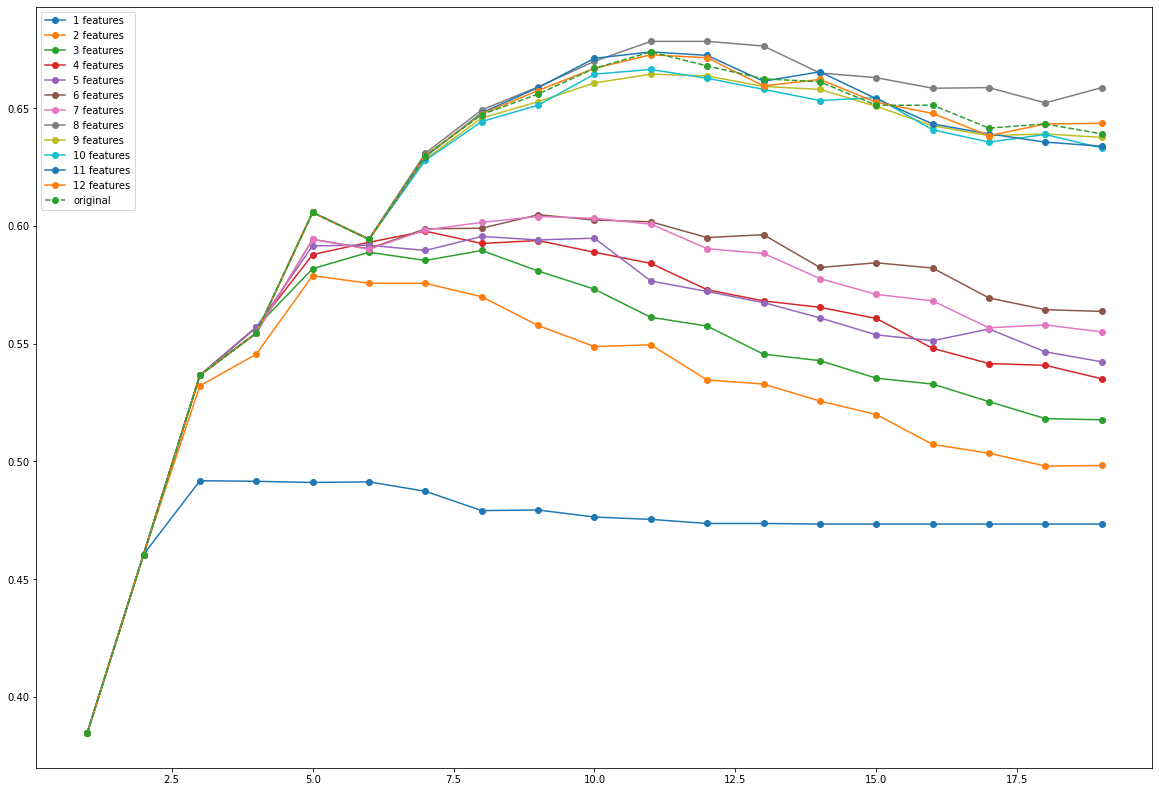

In [20]:
Score_clt = []
for m in range(1,20):
    clt = DecisionTreeClassifier(criterion='gini',max_depth=m)
    clt.fit(x_train,y_train)
    Score_clt.append(clt.score(x_test,y_test))

plt.figure(figsize=(20,14))
for i in range(len(Score_clt_sc_total)):
    plt.plot(range(1,20),Score_clt_sc_total[i],"o-",label='{} features'.format((i+1)))
plt.plot(range(1,20),Score_clt,"o--",label='original')
plt.legend(loc='best')
plt.show()

### Random Forest_Feature selection

In [21]:
Score_clr_sc_total = []
for i in range(1,13,1):
    fssc = fs.SelectKBest(fs.mutual_info_classif,k=i)
    x_train_sc = fssc.fit_transform(x_train,y_train)
    x_test_sc = fssc.transform(x_test)
    print('for select {} features:'.format(i))
    Score_clr_sc = []
    for m in range(1,502,100):    
        clr_sc = RandomForestClassifier(criterion='gini', n_estimators=m, random_state=100, n_jobs=8)
        clr_sc.fit(x_train_sc,y_train)
        print('for {} trees:'.format(m),end='  ')
        print('train:',clr_sc.score(x_train_sc,y_train),end='  ')
        print('test',clr_sc.score(x_test_sc,y_test))
        Score_clr_sc.append(clr_sc.score(x_test_sc,y_test))
    Score_clr_sc_total.append(Score_clr_sc)

for select 1 features:
for 1 trees:  train: 0.49589333333333335  test 0.45843703334992536
for 101 trees:  train: 0.5085866666666666  test 0.4718765555002489
for 201 trees:  train: 0.5086933333333333  test 0.4726231956197113
for 301 trees:  train: 0.5086933333333333  test 0.47336983573917374
for 401 trees:  train: 0.5086933333333333  test 0.4763563962170234
for 501 trees:  train: 0.5086933333333333  test 0.4738675958188153
for select 2 features:
for 1 trees:  train: 0.7418666666666667  test 0.47735191637630664
for 101 trees:  train: 0.8557866666666667  test 0.4965156794425087
for 201 trees:  train: 0.8557866666666667  test 0.49726231956197114
for 301 trees:  train: 0.8557866666666667  test 0.4950223992035839
for 401 trees:  train: 0.8557866666666667  test 0.49452463912394223
for 501 trees:  train: 0.8557866666666667  test 0.49153807864609256
for select 3 features:
for 1 trees:  train: 0.8133333333333334  test 0.5062220009955202
for 101 trees:  train: 0.99904  test 0.5614733698357391
for

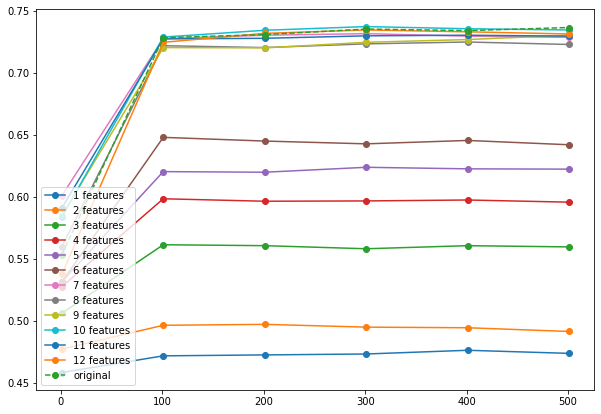

In [22]:
Score_clr = []
for m in range(1,502,100):    
    clr = RandomForestClassifier(criterion='entropy', n_estimators=m, random_state=100, n_jobs=8)
    clr.fit(x_train,y_train)
    Score_clr.append(clr.score(x_test,y_test))

plt.figure(figsize=(10,7))
for i in range(len(Score_clr_sc_total)):
    plt.plot(range(1,502,100),Score_clr_sc_total[i],"o-",label='{} features'.format((i+1)))
plt.plot(range(1,502,100),Score_clr,"o--",label='original')
plt.legend(loc='lower left')
plt.show()

## PCA

In [23]:
pca = PCA(n_components=12)
x_train_p = pd.DataFrame(pca.fit_transform(x_train),columns=(f'Axis{i}' for i in range(1,13)),index=x_train.index)
x_test_p = pd.DataFrame(pca.transform(x_test),columns=(f'Axis{i}' for i in range(1,13)),index=x_test.index)

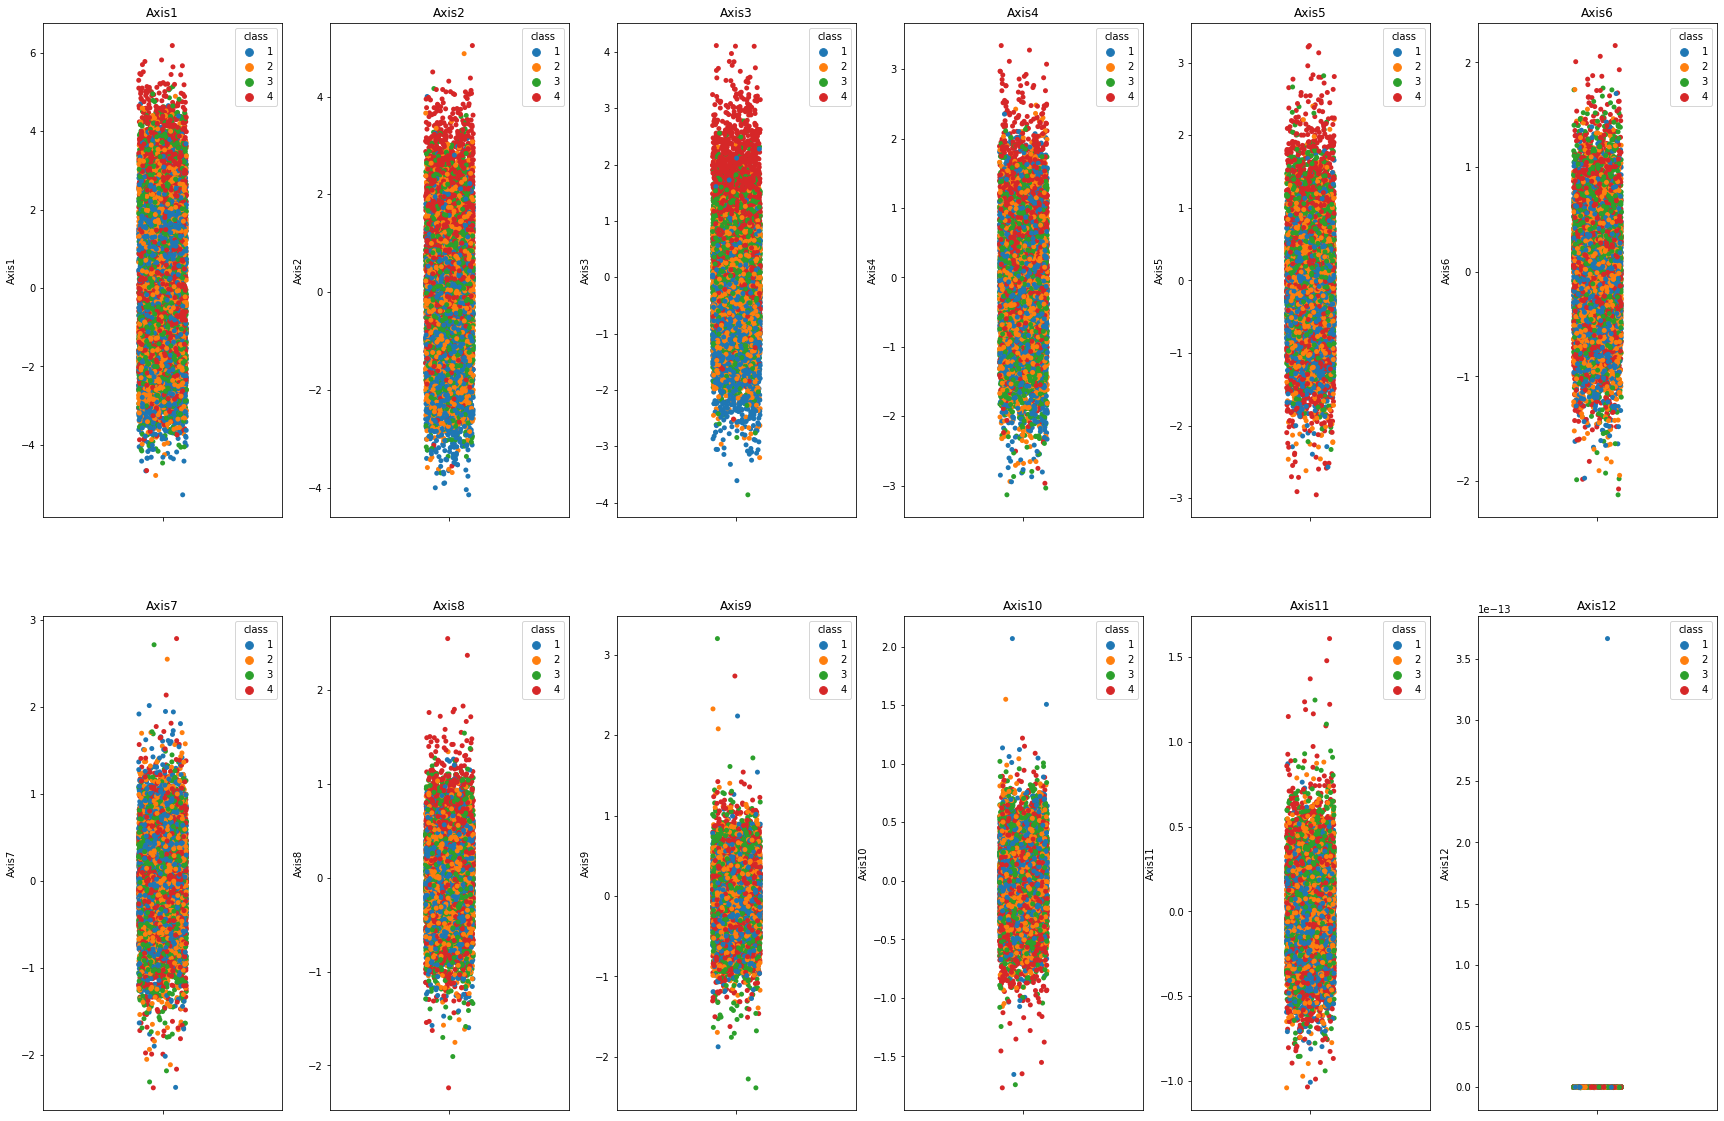

In [24]:
# need to put this term into the sns.stripplot so it can show the hue effect
nulldataframe = pd.Series(['']*len(x_train_p),index=x_train_p.index)

f = plt.figure(figsize=(30,20))
for i in range(12):
    f.add_subplot(2,6,i+1)
    sns.stripplot(y=x_train_p.iloc[:,i],x=nulldataframe,hue=y_train['class'],jitter=True).set(title=f'{x_train_p.columns[i]}')
plt.show()